In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import image
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [67]:
case = "MESOCOSM_Webster_123kgN"
path = "/glade/scratch/jinmuluo/archive/"+case+"/lnd/hist/" 
h = 'h0'
start_date = date(2014, 1, 1)
end_date = date(2022, 12, 1)
delta = end_date - start_date
roiVars = ['SMINN', 'SMINN_vr', 'SMIN_NH4', 'SMIN_NO3', 'F_NIT', 'F_DENIT',
           'MANURE_N_GRZ', 'MANURE_N_BARNS', 'FERT_N_APP', 'NDEP_TO_SMINN', 'NFIX', 'FFIX_TO_SMINN',
           'NH3_TOTAL', 'NOx_NITRIFY_TOTAL', 'N2O_NITRIFY_TOTAL', 'NOx_DENITRIFY_TOTAL', 'N2O_DENITRIFY_TOTAL', 'N2_TOTAL', 
           'F_N2O_NIT', 'F_NOx_NIT', 'F_N2O_DENIT', 'F_NOx_DENIT', 'F_N2_DENIT', 
           'SMIN_NO3_RUNOFF', 'SMIN_NO3_LEACHED', 'SMINN_TO_PLANT_FUN', 'ACTUAL_IMMOB', 'GROSS_NMIN',
           'WOOD_HARVESTN', 'CROPPROD1N', 'CROPPROD1N_LOSS', 'COL_FIRE_NLOSS',]


delta_months = (end_date.year - start_date.year)*12 + end_date.month - start_date.month + 1
fanCLM = []
for i in range(delta_months):
    month = start_date + relativedelta(months=i)
    month = month.strftime('%Y-%m')
    fanCLM.append(path + case + ".clm2." + h + "." + month +".nc")

In [68]:
def preprocess(ds, fields = roiVars):
    return(ds[fields])

def fix_time(ds):  
    date0 = ds['time'][0].values
    date1 = ds['time'][-1].values
    # ds['time'] =xr.cftime_range(str(yr0),periods=ndays,freq='D')
    ds['time'] = pd.date_range(str(date0),str(date1),freq='MS') 
    
    return ds

dsCLM = fix_time(xr.open_mfdataset(fanCLM, decode_times=True, preprocess=preprocess))
dsCLM

<xarray.Dataset>
Dimensions:              (time: 108, lndgrid: 1, levsoi: 20)
Coordinates:
  * levsoi               (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.95 6.94 8.03
  * time                 (time) datetime64[ns] 2014-02-01 ... 2023-01-01
Dimensions without coordinates: lndgrid
Data variables: (12/32)
    SMINN                (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    SMINN_vr             (time, levsoi, lndgrid) float32 dask.array<chunksize=(1, 20, 1), meta=np.ndarray>
    SMIN_NH4             (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    SMIN_NO3             (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    F_NIT                (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    F_DENIT              (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    ...                   ...
    ACTUAL_IMMOB         (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    GROSS_NMIN           (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    WOOD_HARVESTN        (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    CROPPROD1N           (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    CROPPROD1N_LOSS      (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    COL_FIRE_NLOSS       (time, lndgrid) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes: (12/101)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 10/26/23 21:50:25
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    Time_constant_3Dvars_filename:        ./MESOCOSM_Webster_123kgN.clm2.h1.2...
    Time_constant_3Dvars:                 ZSOI:DZSOI:WATSAT:SUCSAT:BSW:HKSAT:...

In [69]:
Ninput =  dsCLM['MANURE_N_GRZ'] + dsCLM['MANURE_N_BARNS'] + dsCLM['FERT_N_APP'] + dsCLM['NDEP_TO_SMINN'] \
          + dsCLM['NFIX'] + dsCLM['FFIX_TO_SMINN']
Noutput = dsCLM['NH3_TOTAL'] + dsCLM['NOx_NITRIFY_TOTAL'] + dsCLM['NOx_DENITRIFY_TOTAL'] \
         + dsCLM['N2O_NITRIFY_TOTAL'] + dsCLM['N2O_DENITRIFY_TOTAL'] + dsCLM['N2_TOTAL'] \
         + dsCLM['F_N2O_NIT'] + dsCLM['F_NOx_NIT'] \
         + dsCLM['F_N2O_DENIT'] + dsCLM['F_NOx_DENIT'] + dsCLM['F_N2_DENIT']  \
         + dsCLM['SMIN_NO3_RUNOFF'] + dsCLM['SMIN_NO3_LEACHED'] \
         + dsCLM['WOOD_HARVESTN'] + dsCLM['CROPPROD1N_LOSS'] + dsCLM['COL_FIRE_NLOSS']

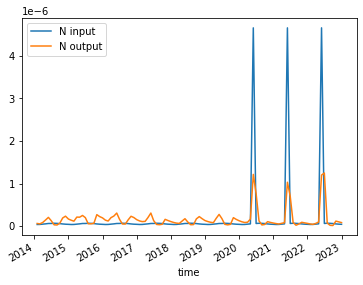

In [70]:
Ninput.plot(label='N input')
Noutput.plot(label='N output')
plt.legend()

## Budget (unit is in gN/m2/elected time period)

In [71]:
def GetCula(stry, endy, dsVar):
    dsTerm = dsVar.sel(time=slice(stry, endy))
    seconds = np.zeros(len(dsTerm))
    for i, t in enumerate(dsTerm.time):
        term = str(t.values)
        date_end = date
        date_end = date(int(term[0:4]), int(term[5:7]), int(term[8:10]))
        date_begin = date_end - relativedelta(months=1)
        # from gN/m2/s to gN/m2, in this period of time
        seconds[i] = (date_end - date_begin).days*24*3600
    result = np.sum(dsTerm.values.reshape(len(dsTerm))*seconds)
    return result
    

In [72]:
print(GetCula('2022-01-01', '2023-01-01', dsCLM['NH3_TOTAL']))
print('NOx from nitrification:', GetCula('2022-01-01', '2023-01-01', dsCLM['NOx_NITRIFY_TOTAL']) + GetCula('2022-01-01', '2023-01-01', dsCLM['F_NOx_NIT']))
print('NOx from Denitrification:', GetCula('2022-01-01', '2023-01-01', dsCLM['NOx_DENITRIFY_TOTAL']) + GetCula('2022-01-01', '2023-01-01', dsCLM['F_NOx_DENIT']))
print('N2O from nitrification:', GetCula('2022-01-01', '2023-01-01', dsCLM['N2O_NITRIFY_TOTAL']) + GetCula('2022-01-01', '2023-01-01', dsCLM['F_N2O_NIT']))
print('N2O from denitrification:', GetCula('2022-01-01', '2023-01-01', dsCLM['N2O_DENITRIFY_TOTAL']) + GetCula('2022-01-01', '2023-01-01', dsCLM['F_N2O_DENIT']))
print('N2:', GetCula('2022-01-01', '2023-01-01', dsCLM['N2_TOTAL']) + GetCula('2022-01-01', '2023-01-01', dsCLM['F_N2_DENIT']))
print('Plant uptake', GetCula('2022-01-01', '2023-01-01', dsCLM['SMINN_TO_PLANT_FUN']) )
print('Runoff and leached:', GetCula('2022-01-01', '2023-01-01', dsCLM['SMIN_NO3_RUNOFF']) + GetCula('2022-01-01', '2023-01-01', dsCLM['SMIN_NO3_LEACHED']))
print('Crop product', GetCula('2022-01-01', '2023-01-01', dsCLM['CROPPROD1N_LOSS']))
print('Crop product', GetCula('2022-01-01', '2023-01-01', dsCLM['CROPPROD1N']))
print('Immobilization', GetCula('2022-01-01', '2023-01-01', dsCLM['ACTUAL_IMMOB']))
print('Mineralization', GetCula('2022-01-01', '2023-01-01', dsCLM['GROSS_NMIN']))

print('Fixation', GetCula('2022-01-01', '2023-01-01', dsCLM['NFIX']) + GetCula('2022-01-01', '2023-01-01', dsCLM['FFIX_TO_SMINN']))
print('Deposition', GetCula('2022-01-01', '2023-01-01', dsCLM['NDEP_TO_SMINN']))
print('Fire', GetCula('2022-01-01', '2023-01-01', dsCLM['COL_FIRE_NLOSS']))


1.0277579893652138
NOx from nitrification: 0.6464360731601702
NOx from Denitrification: 2.9806020825452797
N2O from nitrification: 0.16553227132328233
N2O from denitrification: 0.8621400002337302
N2: 0.8052712382619305
Plant uptake 10.94724769699269
Runoff and leached: 0.2461555623997719
Crop product 1.5907796808591002
Crop product 22094371.77386284
Immobilization 16.777622540416814
Mineralization 20.85377679553062
Fixation 0.2816510258554672
Deposition 1.5424831913378512
Fire 0.0498732196660967


## Vertical plot of soil profile

In [73]:
dsMESOCOSM = pd.read_csv("/glade/scratch/jinmuluo/MESOCOSM_fluxtower_BOOI4/measurements/mescocosm_extracted_soil_nitrogen_2022.csv")
dsMESOCOSM['date'] = ['20' + str(t) for t in dsMESOCOSM['date'].values]
dsMESOCOSM['date'] = pd.to_datetime(dsMESOCOSM['date']) + pd.Timedelta(hours=0, minutes=0, seconds=0)
dsMESOCOSM['soil_sminn'] = dsMESOCOSM['soil_nitrate_mgN_kg'] + dsMESOCOSM['soil_ammonium_mgN_kg']
dsMESOCOSM .set_index(['soil', 'N_rate_kg_ha', 'block', 'date'], inplace=True)
dsMESOCOSM = dsMESOCOSM.sort_index()

## Nitrification/Denitrification

6.603480924043481


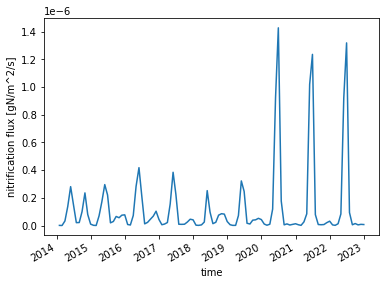

In [74]:
dsCLM['F_NIT'].plot()
print(GetCula('2022-01-01', '2023-01-01', dsCLM['F_NIT']))

5.0094002010892345


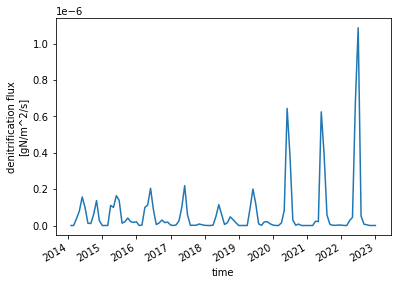

In [75]:
dsCLM['F_DENIT'].plot()
print(GetCula('2022-01-01', '2023-01-01', dsCLM['F_DENIT']))